In [98]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
target_mapping=pd.read_csv('/Users/amit/Desktop/Career/project/timeseries/dataset/MovementAAL_target.csv',header=0)
group_mapping=pd.read_csv('/Users/amit/Desktop/Career/project/timeseries/timeseries/IndoorMovement/groups/MovementAAL_DatasetGroup.csv',header=0)
paths_mapping=pd.read_csv('/Users/amit/Desktop/Career/project/timeseries/timeseries/IndoorMovement/groups/MovementAAL_Paths.csv',header=0)

In [100]:
path =r'dataset' # use your path
allFiles = glob.glob('dataset' + "/*.csv")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None)
    list_.append(df)

frame = pd.concat(list_, axis = 0, ignore_index = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [101]:
frame.columns

Index([' RSS_anchor2', ' RSS_anchor3', ' RSS_anchor4', ' class_label',
       '#RSS_anchor1', '#sequence_ID'],
      dtype='object')

In [102]:
frame=frame.drop(frame.columns[[3,5]],axis=1)

In [104]:
target_mapping.head()

,#sequence_ID,class_label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


#### The target variable #sequence_ID is identifier and class_label is target value that we will be trying to predict and that value 1 means the transition and -1 is no transition.
* transition refers to a person is walking to another room or not

# ![title](timeseries/IndoorMovement/transitioncartoon.png)

In [106]:
print(len(frame),target_mapping.shape)

13511 (314, 2)


In [112]:
target_mapping[' class_label'].value_counts()

 1    158
-1    156
Name:  class_label, dtype: int64

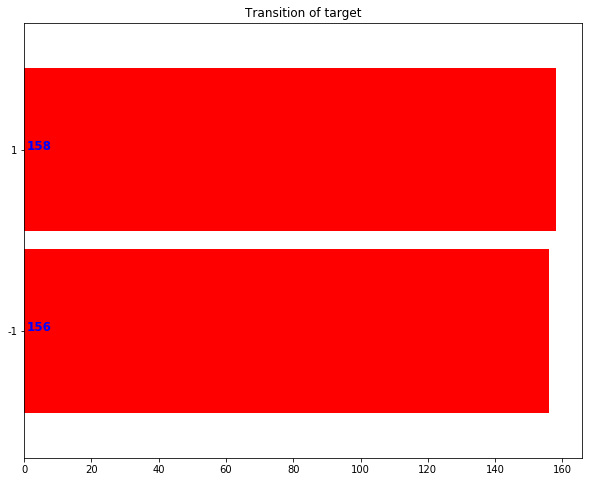

In [115]:
plt.figure(figsize=(10,8))
ax=target_mapping[' class_label'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color='r')
for i, v in enumerate(target_mapping[' class_label'].value_counts().sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='b',weight='bold')
plt.title('Transition of target')
plt.show()


## -1 Stands for NO TRANSITION AND 1 STANDS FOR TRANSITION